In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import math
from keras.layers import Dense
from keras.layers import GRU,LSTM,RNN, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## **Import whole data:**

In [12]:
df=pd.read_csv("/content/Brazil (1).csv", engine='python')


## **Choose the country and new cases:**

In [13]:
df=df[df['location']=='Russia']
df=df[['date','new_cases']]

In [14]:
df

,date,new_cases
38565,2019-12-31,0.0
38566,2020-01-01,0.0
38567,2020-01-02,0.0
38568,2020-01-03,0.0
38569,2020-01-04,0.0
...,...,...
38848,2020-10-09,11493.0
38849,2020-10-10,12126.0
38850,2020-10-11,12846.0
38851,2020-10-12,13634.0


## **Plot Figures:**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


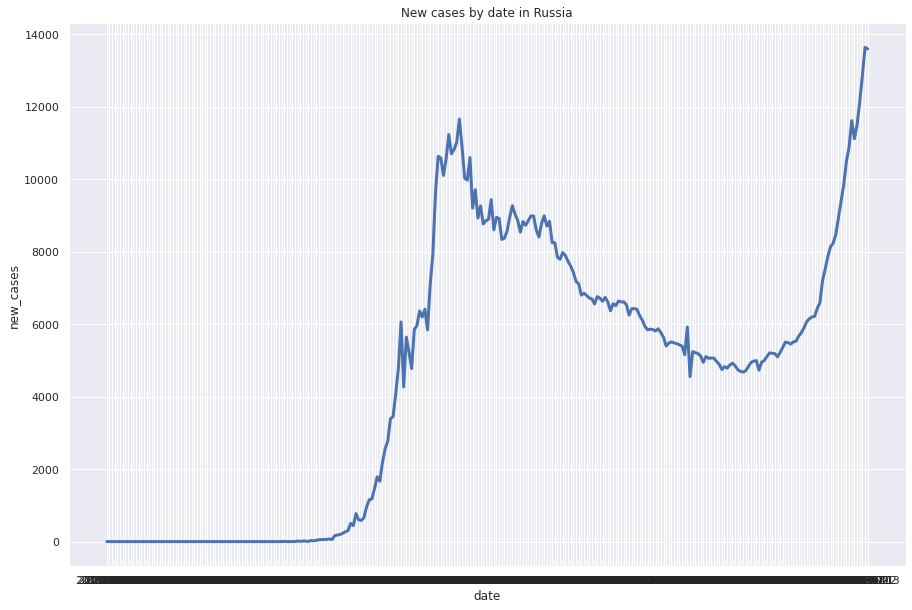

In [15]:
# plt.figure(figsize=(20,15))
# plt.subplot(211)
# plt.plot(df['date'],df['new_cases'])

sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots (figsize=(15,10))
sns.lineplot ('date','new_cases', data=df, linewidth=3)
plt.title ('New cases by date in Russia')
plt.show()

#plt.figure(figsize=(20,10))
#plt.subplot(212)
#plt.plot(df_['date'],df_['new_deaths'],'r')
#plt.show()


# **Data Preprocessing:**

In [16]:
case_series=df['new_cases'].astype('float32')
case_series=pd.DataFrame(case_series)



In [17]:
case_series=case_series.fillna(0)
case_series

,new_cases
38565,0.0
38566,0.0
38567,0.0
38568,0.0
38569,0.0
...,...
38848,11493.0
38849,12126.0
38850,12846.0
38851,13634.0


In [18]:
import numpy
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset.iloc[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset.iloc[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
timestep=3
X_case, y_case = create_dataset(case_series, timestep)


In [20]:
train_size=int(len(case_series)*0.95)

In [21]:
x_case_train,x_case_valid=X_case[:train_size,:],X_case[train_size:,:]
y_case_train,y_case_valid=y_case[:train_size],y_case[train_size:]


In [22]:
n_features = 1
x_case_train = x_case_train.reshape((x_case_train.shape[0], x_case_train.shape[1], n_features))

#x_case_test=x_case_test.reshape((x_case_test.shape[0], x_case_test.shape[1], n_features))


## **Model preperation:**

In [23]:

model = Sequential()
model.add((GRU(50,return_sequences=True,activation='relu', input_shape=(timestep, n_features))))
model.add((GRU(20,activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_case_train,y_case_train, epochs=600, verbose=2)

Epoch 1/600
9/9 - 0s - loss: 29511122.0000
Epoch 2/600
9/9 - 0s - loss: 27761380.0000
Epoch 3/600
9/9 - 0s - loss: 24992936.0000
Epoch 4/600
9/9 - 0s - loss: 21988966.0000
Epoch 5/600
9/9 - 0s - loss: 17703846.0000
Epoch 6/600
9/9 - 0s - loss: 10030136.0000
Epoch 7/600
9/9 - 0s - loss: 5376786.0000
Epoch 8/600
9/9 - 0s - loss: 1409342.1250
Epoch 9/600
9/9 - 0s - loss: 226989.0625
Epoch 10/600
9/9 - 0s - loss: 305962.7500
Epoch 11/600
9/9 - 0s - loss: 185733.0938
Epoch 12/600
9/9 - 0s - loss: 183943.1875
Epoch 13/600
9/9 - 0s - loss: 173063.8594
Epoch 14/600
9/9 - 0s - loss: 165938.0156
Epoch 15/600
9/9 - 0s - loss: 180405.8750
Epoch 16/600
9/9 - 0s - loss: 162051.2812
Epoch 17/600
9/9 - 0s - loss: 151373.2656
Epoch 18/600
9/9 - 0s - loss: 171606.6250
Epoch 19/600
9/9 - 0s - loss: 174125.7500
Epoch 20/600
9/9 - 0s - loss: 166288.3594
Epoch 21/600
9/9 - 0s - loss: 164733.7031
Epoch 22/600
9/9 - 0s - loss: 171688.8438
Epoch 23/600
9/9 - 0s - loss: 166815.7656
Epoch 24/600
9/9 - 0s - loss:

# **Check validation data:**

In [24]:

case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[train_size-15:(train_size+timestep-15)])

x_input=numpy.array(x_input)



In [25]:
x_input

array([5449., 5509., 5529.], dtype=float32)

In [26]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<(len(case_series)-train_size)):
    
    if(len(temp_input)>timestep):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[5563.4766]
1 day input [5509.     5529.     5563.4766]
[5509.     5529.     5563.4766]
[[[5509.    ]
  [5529.    ]
  [5563.4766]]]
1 day output [[5592.278]]
2 day input [5529.     5563.4766 5592.278 ]
[5529.     5563.4766 5592.278 ]
[[[5529.    ]
  [5563.4766]
  [5592.278 ]]]
2 day output [[5623.504]]
3 day input [5563.4766 5592.278  5623.504 ]
[5563.4766 5592.278  5623.504 ]
[[[5563.4766]
  [5592.278 ]
  [5623.504 ]]]
3 day output [[5653.947]]
4 day input [5592.278 5623.504 5653.947]
[5592.278 5623.504 5653.947]
[[[5592.278]
  [5623.504]
  [5653.947]]]
4 day output [[5684.8813]]
5 day input [5623.504  5653.947  5684.8813]
[5623.504  5653.947  5684.8813]
[[[5623.504 ]
  [5653.947 ]
  [5684.8813]]]
5 day output [[5715.8022]]
6 day input [5653.947  5684.8813 5715.8022]
[5653.947  5684.8813 5715.8022]
[[[5653.947 ]
  [5684.8813]
  [5715.8022]]]
6 day output [[5746.9116]]
7 day input [5684.8813 5715.8022 5746.9116]
[5684.8813 5715.8022 5746.9116]
[[[5684.8813]
  [5715.8022]
  [5746.9116]]

In [27]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(train_size,train_size+(len(case_series)-train_size))


In [28]:
lst_output=numpy.array(lst_output)
lst_output

array([5563.4766, 5592.278 , 5623.504 , 5653.947 , 5684.8813, 5715.8022,
       5746.9116, 5778.129 , 5809.488 , 5840.975 , 5872.598 , 5904.3535,
       5936.243 , 5968.2676, 6000.4272], dtype=float32)

No handles with labels found to put in legend.


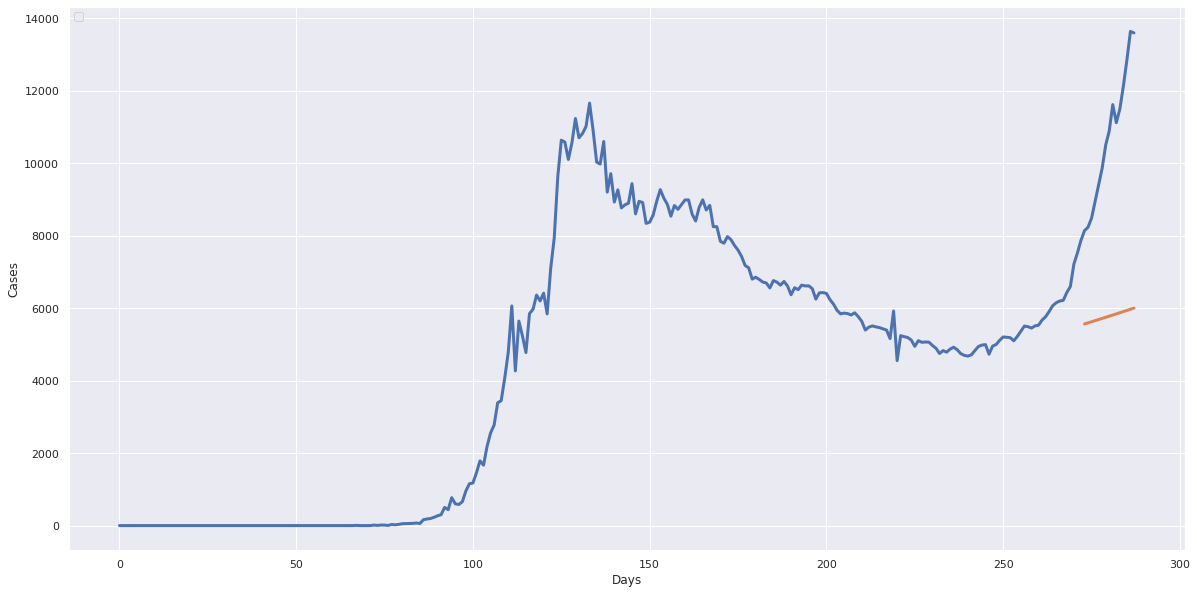

In [29]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.show()

# Forecasting:

---



---



In [30]:
case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[-timestep:])
x_input=numpy.array(x_input)



In [31]:

x_input

array([12846., 13634., 13592.], dtype=float32)

In [32]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<40):
    
    if(len(temp_input)>timestep):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[13711.151]
1 day input [13634.    13592.    13711.151]
[13634.    13592.    13711.151]
[[[13634.   ]
  [13592.   ]
  [13711.151]]]
1 day output [[13755.151]]
2 day input [13592.    13711.151 13755.151]
[13592.    13711.151 13755.151]
[[[13592.   ]
  [13711.151]
  [13755.151]]]
2 day output [[13828.563]]
3 day input [13711.151 13755.151 13828.563]
[13711.151 13755.151 13828.563]
[[[13711.151]
  [13755.151]
  [13828.563]]]
3 day output [[13890.634]]
4 day input [13755.151 13828.563 13890.634]
[13755.151 13828.563 13890.634]
[[[13755.151]
  [13828.563]
  [13890.634]]]
4 day output [[13957.587]]
5 day input [13828.563 13890.634 13957.587]
[13828.563 13890.634 13957.587]
[[[13828.563]
  [13890.634]
  [13957.587]]]
5 day output [[14022.989]]
6 day input [13890.634 13957.587 14022.989]
[13890.634 13957.587 14022.989]
[[[13890.634]
  [13957.587]
  [14022.989]]]
6 day output [[14089.395]]
7 day input [13957.587 14022.989 14089.395]
[13957.587 14022.989 14089.395]
[[[13957.587]
  [14022.989]
  

In [33]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(len(case_series)-1,len(case_series)+39)


No handles with labels found to put in legend.


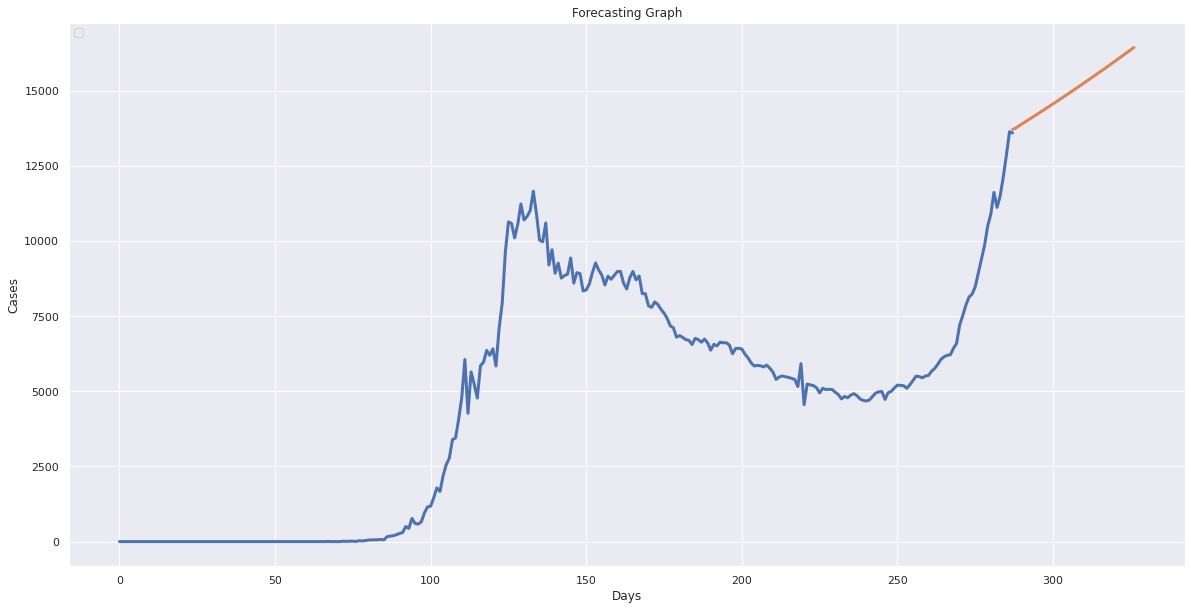

In [34]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.title('Forecasting Graph')
plt.show()